# Assignment 1: Small Image Dataset
The assignment consists of the following points:
1) Download the data for this assignment, you can find it in the file lab2_2_data.zip.
2) Implement a function that, given an input vector p whose elements are +1s and -1s, and a scalar value d (within 0.05 and 1) returns a perturbed/distorted version of the input vector, flipping (i.e., changing the sign) of the d*100 % its elements. You can find an example of such a function, implemented in MATLAB, in “distort_image.m” file (in the archive download at point 1) ). You can interpret the input p as ain input image, and d as the percentage of distortion to apply.
3) Implement all the code that is required for the different stages in the operation of a Hopfield network, i.e., the storage phase (learning) and the retrieval phase (initialization, iteration until convergence, outputting). Note: in the code also includes the computation of the overlap functions (with respect to the training patterns) and of the energy function.
4) Use the 3 input vectors p0, p1 and p2 (from the corresponding csv files in the archive downloaded in point 1) to train the Hopfield network.
5) Generate distorted versions of the 3 patterns using the function obtained at point 2). For each pattern p_i, generate 3 distorted versions, with percentage of distortion 0.05, 0.1 and 0.25. E.g. (using the provided MATLAB file), d_i_1 = distort_image(p_i,0.05); d_i_2 = distort_image(p_i,0.1); d_i_3 = distort_image(p_i,0.25);

In this step, you will have generated a total number of 9 patterns.

6) Feed the trained Hopfield network with the 9 input patterns generated at the previous point. For each of the 9 input patterns:
    * plot the energy as a function of time;
    * plot the overlap computed for each one of the training patterns, as a function of time; suggestion: use the same figure for plotting all the overlaps
    * plot the reconstructed image and compute a measure of discrepancy (choose the measure of discrepancy you prefer) between the reconstructed image and the optimal corresponding memory (add this result as title caption to the figure).

Note: plots of the energy and overlap functions should be produced considering the evolution of the state of the network per each state update (i.e., the resolution is on the neuron update, not on the epochs)

## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import ndarray


# To work with Google colab
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/LAB2_2/HN_plot_functions.py
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/LAB2_2/HofieldNetwork.py
#!mkdir imgs

from LAB2_2.HN_plot_functions import plot_results, plot_results2
from LAB2_2.HofieldNetwork import HopfieldNetworks, distort_image

## Retrieve the dateset

In [4]:
# To work with Google colab
#!wget https://raw.githubusercontent.com/jacons/Computational-NeuroScience-Lab/master/Sources/numbers.csv
source1 = pd.read_csv("./../Sources/numbers.csv", header=None).to_numpy().T

## Assignment 1: Small Image Dataset

In [5]:
# Initialize the network
network = HopfieldNetworks(all_source = source1)  
network.fit() # Learning phase

def simulate(dataset: ndarray, number:int , alpha:float, bias:float, epochs:int = 2):

  # Retrieval phase
  evolution, overlap, energy = network(init_state = distort_image(dataset[number], alpha),
                                       original = dataset[number],
                                       epochs = epochs,
                                       bias = bias) # retrieval phase

  # (original - final_state)  
  mse = str(round(np.power(np.sum(dataset[number] - evolution[-1]) , 2) / dataset[number].shape[0], 4))

  plot_results(evolution, overlap, energy,
               title = "Evolution of number: "+ str(number) + ", alpha: "+ str(alpha) + ", bias: " + str(bias) + " and MSE: "+ mse,
               filename = "nmb_"+str(number)+" alpha_"+str(alpha).replace("0.",""))

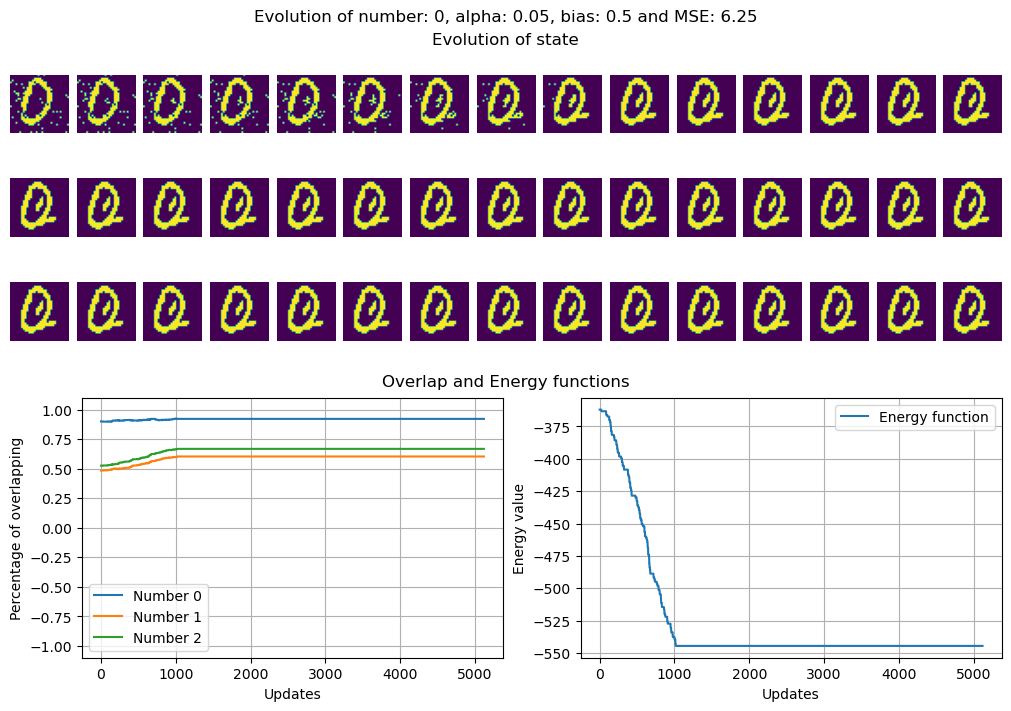

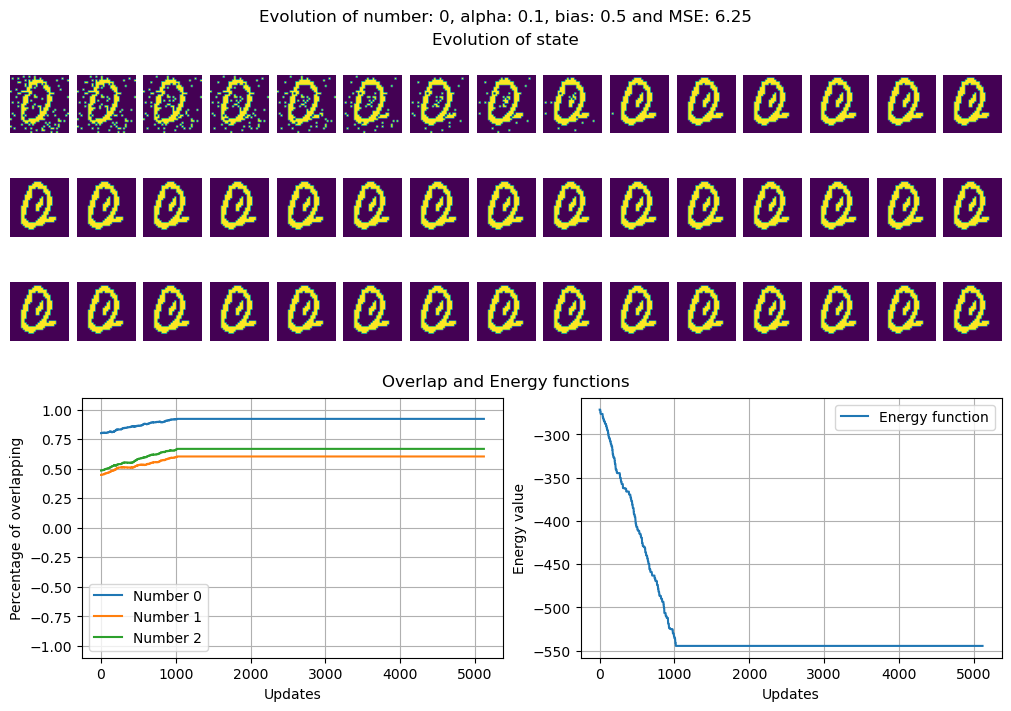

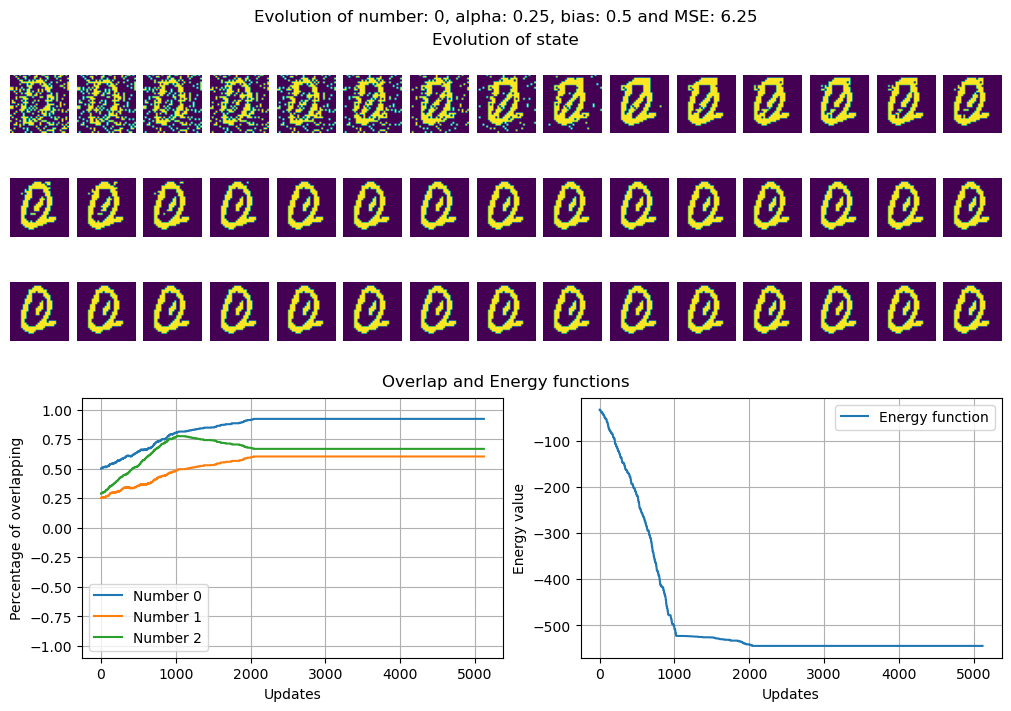

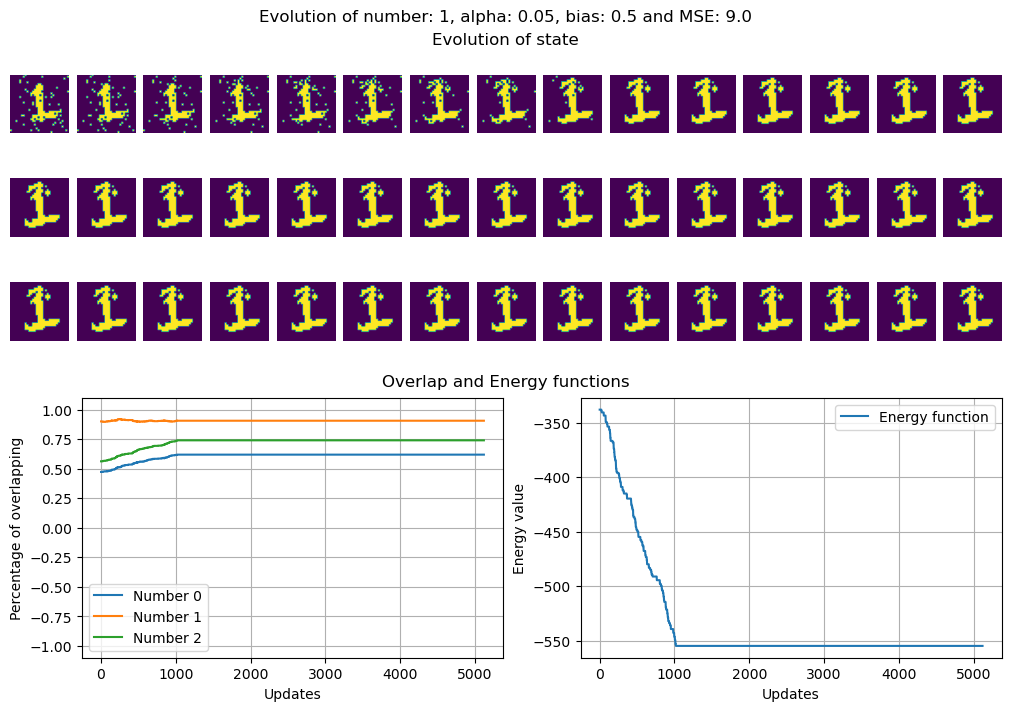

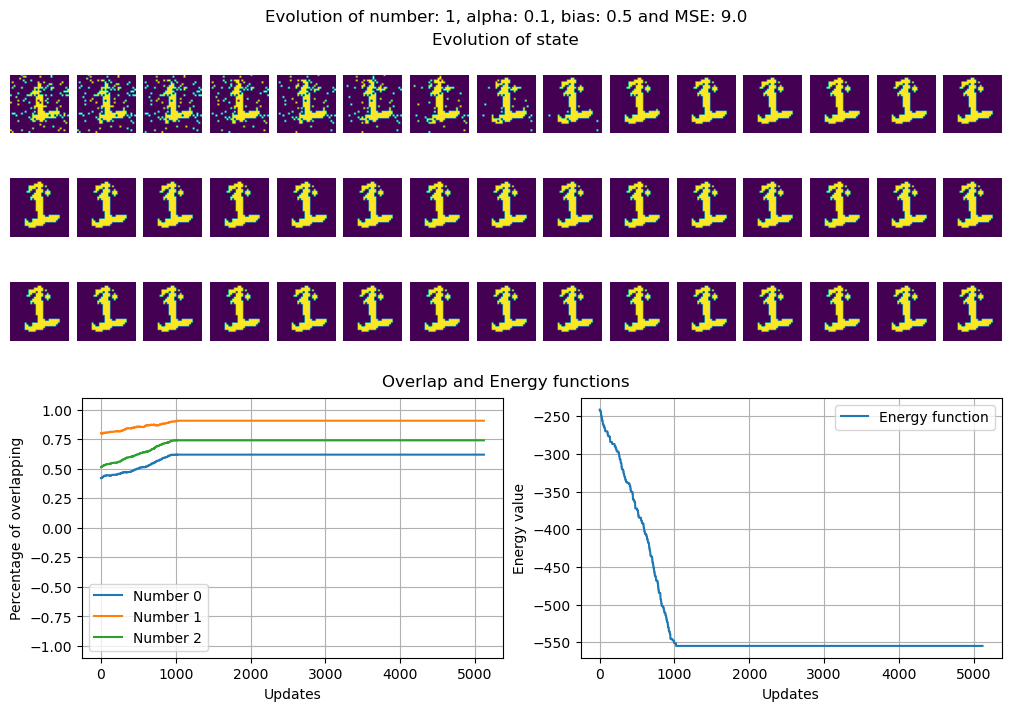

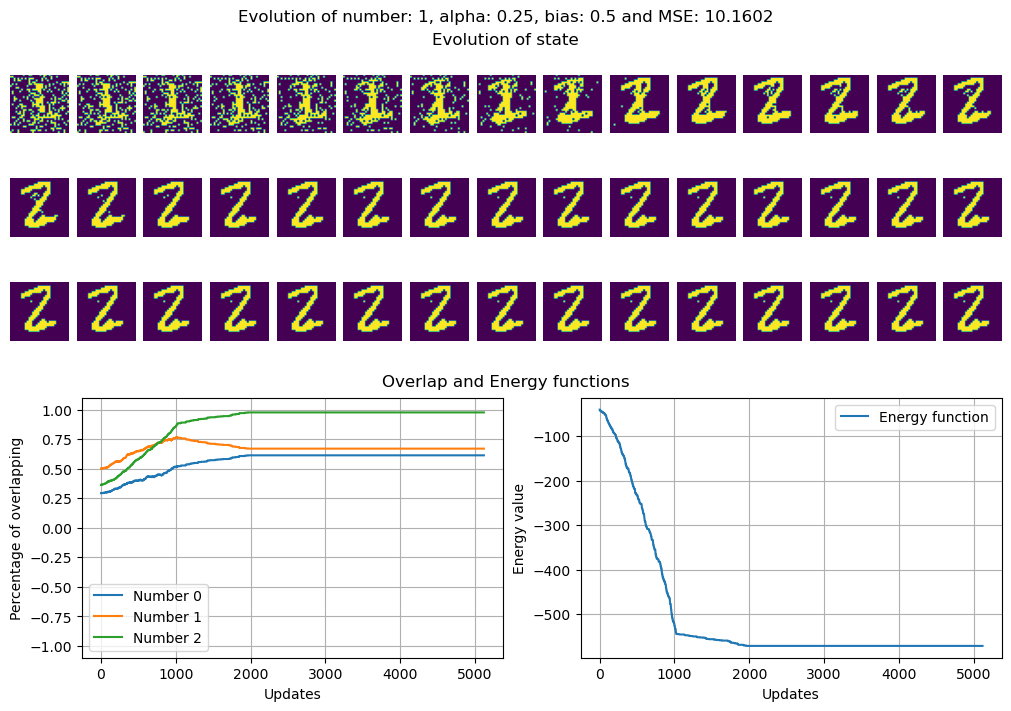

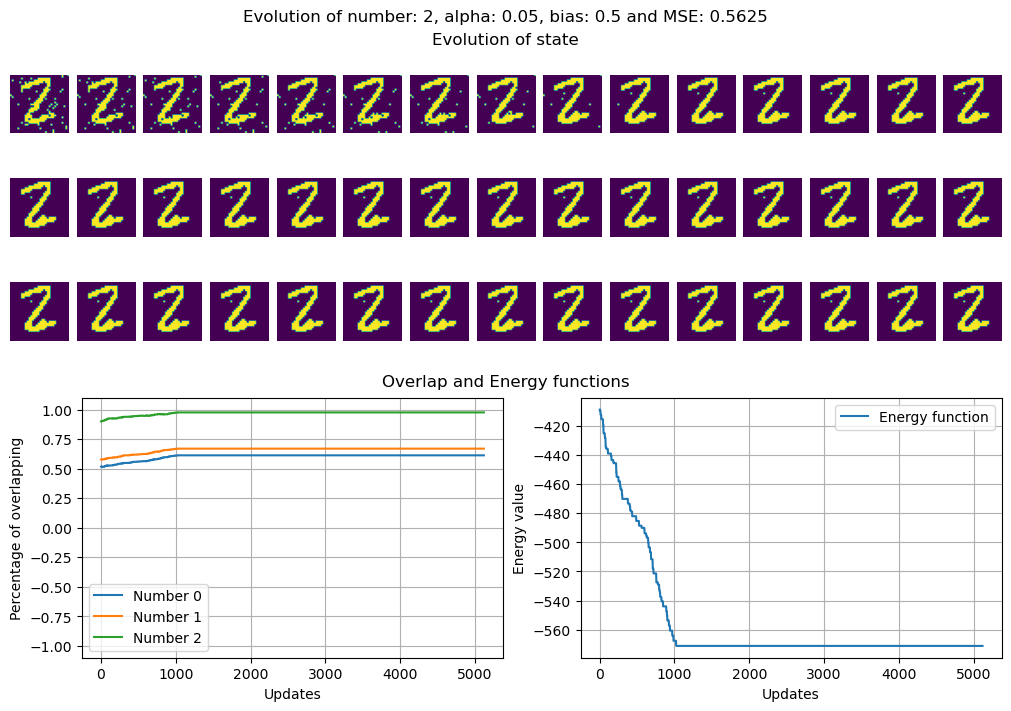

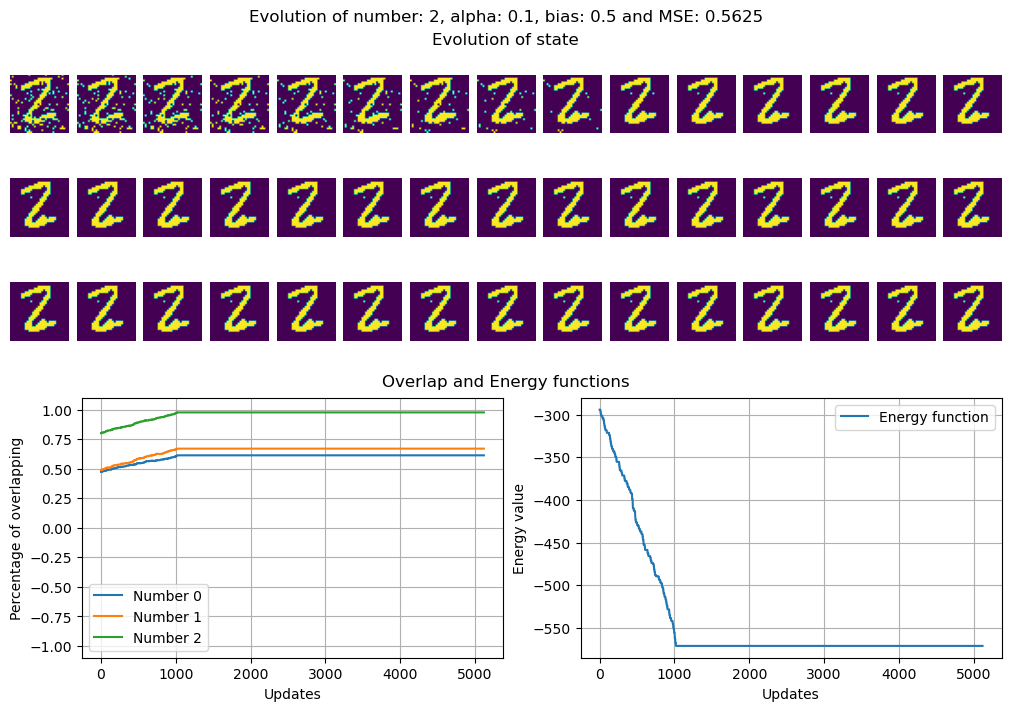

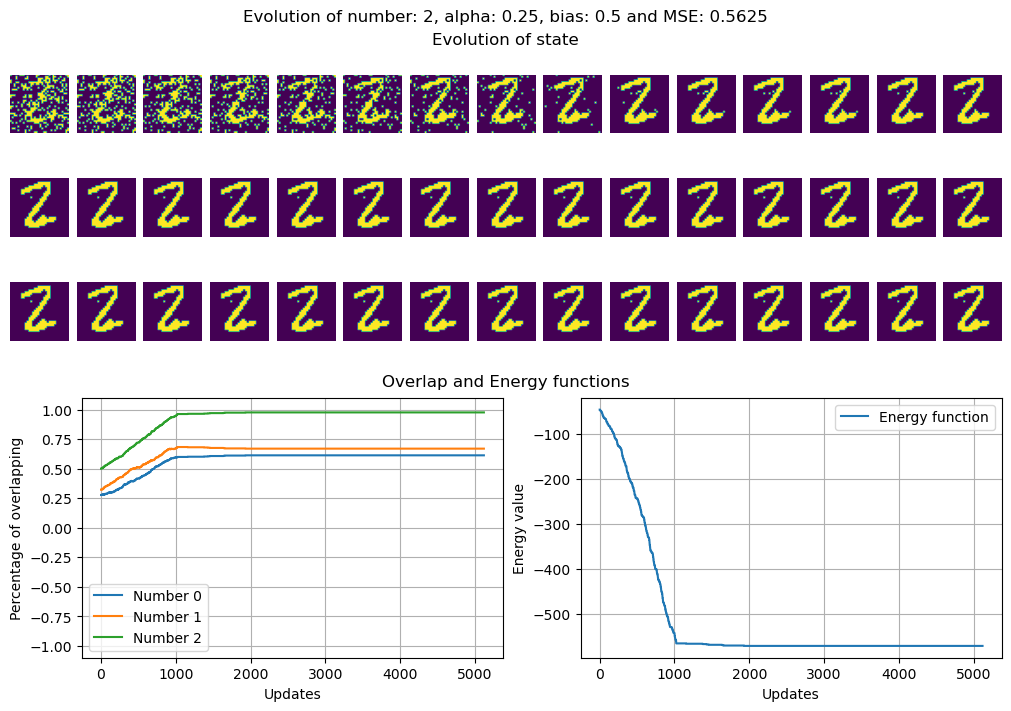

In [6]:
simulate(source1, number = 0, epochs = 5, bias = 0.5, alpha = 0.05)
simulate(source1, number = 0, epochs = 5, bias = 0.5, alpha = 0.1)
simulate(source1, number = 0, epochs = 5, bias = 0.5, alpha = 0.25)

simulate(source1, number = 1, epochs = 5, bias = 0.5, alpha = 0.05)
simulate(source1, number = 1, epochs = 5, bias = 0.5, alpha = 0.1)
simulate(source1, number = 1, epochs = 5, bias = 0.5, alpha = 0.25)

simulate(source1, number = 2, epochs = 5, bias = 0.5, alpha = 0.05)
simulate(source1, number = 2, epochs = 5, bias = 0.5, alpha = 0.1)
simulate(source1, number = 2, epochs = 5, bias = 0.5, alpha = 0.25)

## Bonus Track Assignment # 1 – Synthetic data

Use the code for the implementation of the Hopfield network (written for Assignment1) and
train a new Hopfield network to store the following input patterns

In [7]:
source2 = np.array([[-1, -1, 1, -1, 1, -1, -1, 1], [-1, -1, -1, -1, -1, 1, -1, -1], [-1, 1, 1, -1, -1, 1, -1, 1]])
corrupted2 = np.array([[1, -1, 1, -1, 1, -1, -1, 1], [1, 1, -1, -1, -1, 1, -1, -1], [1, 1, 1, -1, 1, 1, -1, 1]])

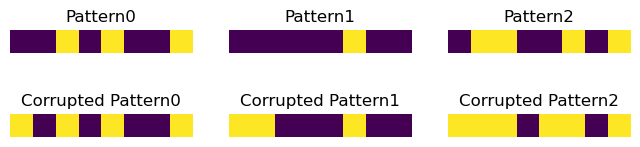

In [8]:
f, axs = plt.subplots(ncols=3,nrows=2, figsize=(8,2))

for i in range(3):
  axs[0,i].imshow(np.expand_dims(source2[i,:], 0))
  axs[0,i].axis("off")
  axs[0,i].set_title("Pattern"+str(i))

for i in range(3):
  axs[1,i].imshow(np.expand_dims(corrupted2[i,:], 0))
  axs[1,i].axis("off")
  axs[1,i].set_title("Corrupted Pattern"+str(i))

plt.show()

Check if the network has effectively stored the 3 patterns as fixed points

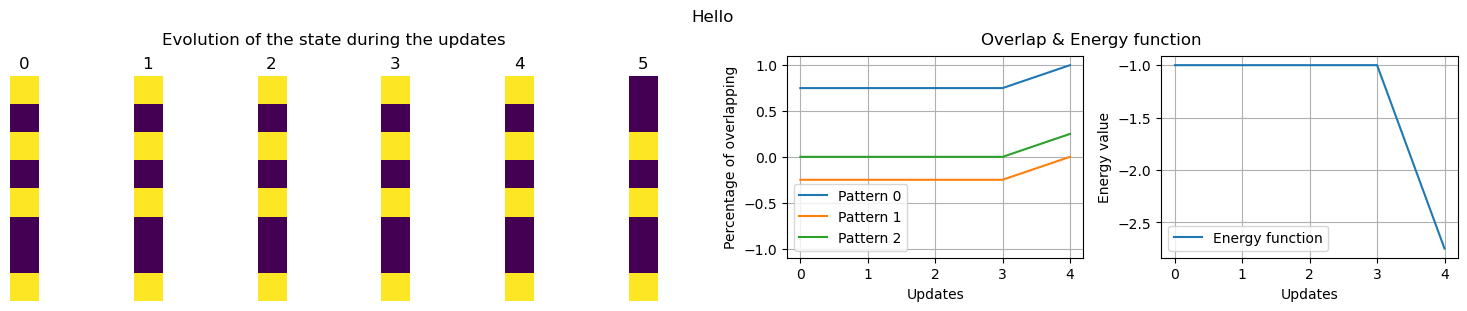

In [9]:
# Initialize the network
network = HopfieldNetworks(all_source = source2)  
network.fit() # Learning phase

evolution, overlap, energy = network(init_state = corrupted2[0, :],
                                       original = source2[0],
                                       epochs = 3,
                                       bias = 0) # retrieval phase
plot_results2(evolution, overlap, energy,
              title="Evolution of the state and function in the pattern 0",
              filename="ptt_0")

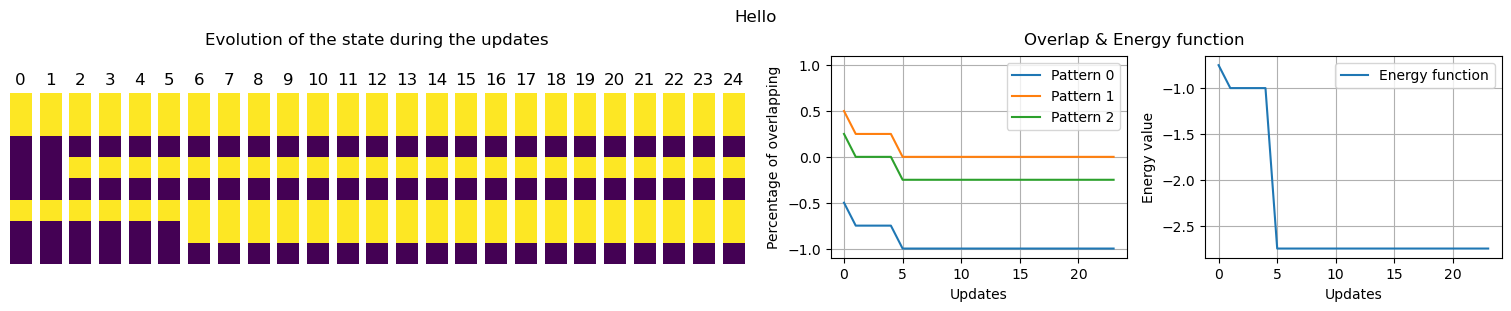

In [10]:
evolution, overlap, energy = network(init_state = corrupted2[1, :],
                                       original = source2[1],
                                       epochs = 3,
                                       bias = 0) # retrieval phase
plot_results2(evolution, overlap, energy,
              title="Evolution of the state and function in the pattern 1",
              filename="ptt_1")

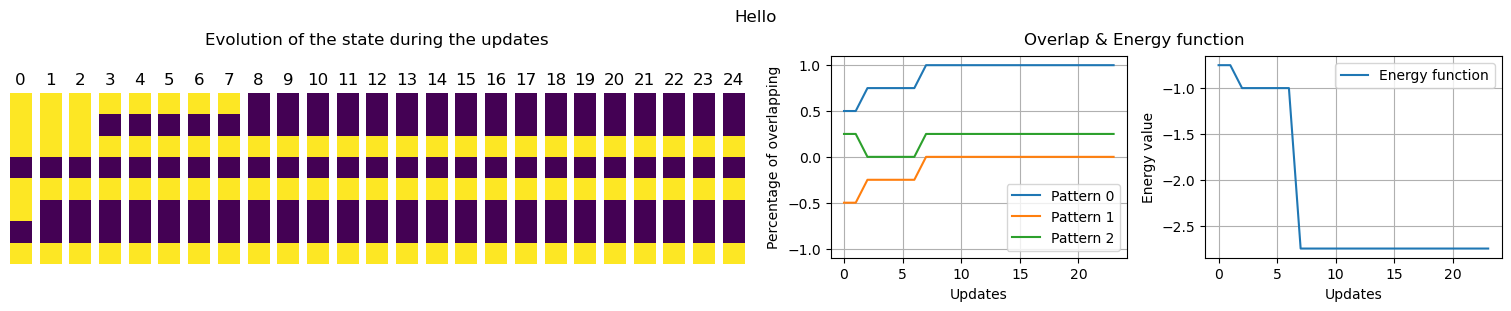

In [11]:
evolution, overlap, energy = network(init_state = corrupted2[2, :],
                                       original = source2[2],
                                       epochs = 3,
                                       bias = 0) # retrieval phase
plot_results2(evolution, overlap, energy,
              title="Evolution of the state and function in the pattern 2",
              filename="ptt_2")